<a href="https://colab.research.google.com/github/arvind-maurya/IIML_Group_Project/blob/main/Predicting_Flight_Delay_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the flight dataset
import pandas as pd #the pandas library is useful for data processing


#Read CSV file from drive. Drive is used because size of the dataset is large
#You need to mound the drive before running this code. Everytime you need to mount the drive before running the code.
df = pd.read_csv('/content/drive/MyDrive/flight_dataset/flights.csv', low_memory=False)

#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:',df.shape)

Dataframe dimensions: (5819079, 31)


In [ ]:
flights_df = df.copy()

In [ ]:
#Lets look at the top rows in dataset
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Lets look at the bottom rows in dataset
flights_df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Dataset flights.csv file description
1. More than 5'810'000 flights have been recorded in 2015.
2. These flights are described according to 31 variables.
3. A description of these variables can be found below

**YEAR, MONTH, DAY, DAY_OF_WEEK**: dates of the flight

**AIRLINE**: An identification number assigned by US DOT to identify a unique airline

**ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: code attributed by IATA to identify the airports

**SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : scheduled times of take-off and landing

**DEPARTURE_TIME** and **ARRIVAL_TIME**: real times at which take-off and landing took place

**DEPARTURE_DELAY** and **ARRIVAL_DELAY**: difference (in minutes) between planned and real times

**DISTANCE**: distance (in miles)

An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

In [ ]:
flights_df.describe(include='all')

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5819079,5.819079e+06,5804358,5819079,5819079,5.819079e+06,...,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,89884,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
unique,NaN,NaN,NaN,NaN,14,NaN,4897,628,629,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,N480HA,ATL,ATL,NaN,...,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1261855,NaN,3768,346836,346904,NaN,...,NaN,NaN,NaN,NaN,48851,NaN,NaN,NaN,NaN,NaN
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,NaN,2.173093e+03,NaN,NaN,NaN,1.329602e+03,...,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,NaN,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,NaN,1.757064e+03,NaN,NaN,NaN,4.837518e+02,...,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,NaN,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,NaN,7.300000e+02,NaN,NaN,NaN,9.170000e+02,...,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,NaN,1.690000e+03,NaN,NaN,NaN,1.325000e+03,...,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,NaN,3.230000e+03,NaN,NaN,NaN,1.730000e+03,...,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,NaN,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00


From the data, i will delete the column which is not relevance for predicting the flight delay re-arranging the columns for better interpretation

In [ ]:
#Given the large size of the dataset, I decide to consider only a subset of the data in order to reduce the computational time.
#I will just keep the flights from January 2015:
flights_df = flights_df[flights_df['MONTH'] == 1]

Now there is no date column provided in the flight dataset. Instead, YEAR, MONTH, DAY, DAY_OF_WEEK  data of the flight is provided. Now i need to know the dates of the flight. To get that i need to combine these column to get the Date Column

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

#The code is creating a new column called 'DATE' in the DataFrame flights_df by combining the 'YEAR', 'MONTH', and 'DAY' columns and converting them into a datetime format
# Create a new column 'DATE' by combining 'YEAR', 'MONTH', and 'DAY' columns
flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']])

#see the DATE column is added in last
flights_df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


If you look at the Schedule departure column, it is given in HHMM format. We will convert that column to something like <Date> <HH:MM:SS> for better representation

In [ ]:
import datetime,  scipy
import numpy as np
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def convert_HHMM_Datetime(hhmm):
    if pd.isnull(hhmm):
        return np.nan
    else:
        if hhmm == 2400: hhmm = 0
        hhmm = "{0:04d}".format(int(hhmm))
        time = datetime.time(int(hhmm[0:2]), int(hhmm[2:4]))
        return time

#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):
    liste = []
    for index, cols in df[['DATE', col]].iterrows():
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_time(cols))
        else:
            cols[1] = convert_HHMM_Datetime(cols[1])
            liste.append(combine_date_time(cols))
    return pd.Series(liste)



In [ ]:
#This convert the depart
flights_df['SCHEDULED_DEPARTURE'] = create_flight_time(flights_df, 'SCHEDULED_DEPARTURE')
flights_df['DEPARTURE_TIME'] = flights_df['DEPARTURE_TIME'].apply(convert_HHMM_Datetime)
flights_df['SCHEDULED_ARRIVAL'] = flights_df['SCHEDULED_ARRIVAL'].apply(convert_HHMM_Datetime)
flights_df['ARRIVAL_TIME'] = flights_df['ARRIVAL_TIME'].apply(convert_HHMM_Datetime)
#__________________________________________________________________________
flights_df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


Note that in practice, the content of the DEPARTURE_TIME and ARRIVAL_TIME variables can be a bit misleading since they don't contain the dates. For example, in the first entry of the dataframe, the scheduled departure is at 0h05 the 1st of January. The DEPARTURE_TIME variable indicates 23h54 and we thus don't know if the flight leaved before time or if there was a large delay. Hence, the DEPARTURE_DELAY and ARRIVAL_DELAY variables proves more useful since they directly provides the delays in minutes. Hence, in what follows, I will not use the DEPARTURE_TIME and ARRIVAL_TIME variables.

From the data, i will delete the column which is not relevance for predicting the flight delay re-arranging the columns for better interpretation

In [ ]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR',
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
flights_df.drop(variables_to_remove, axis = 1, inplace = True)
flights_df = flights_df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
flights_df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


In [ ]:
#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:',flights_df.shape)

Dataframe dimensions: (469968, 11)


In [ ]:
missing_df = flights_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_df.shape[0]-missing_df['missing values'])/flights_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,12955,97.243429
1,ELAPSED_TIME,12955,97.243429
2,ARRIVAL_TIME,12271,97.388971
3,DEPARTURE_TIME,11657,97.519618
4,DEPARTURE_DELAY,11657,97.519618
5,AIRLINE,0,100.000000
6,ORIGIN_AIRPORT,0,100.000000
7,DESTINATION_AIRPORT,0,100.000000
8,SCHEDULED_DEPARTURE,0,100.000000
9,SCHEDULED_ARRIVAL,0,100.000000


Now the dataset contains many missing value and we see that We see that the variables filling factor is good (> 97%). I will  simply remove the entries that contain missing values

In [ ]:
flights_df.dropna(inplace = True)
#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:',flights_df.shape)

Dataframe dimensions: (457013, 11)


**Basic statistical description of airlines**

As a first step, I consider all the flights from all carriers. Here, the aim is to classify the airlines with respect to their punctuality and for that purpose, I compute a few basic statisticial parameters:

In [ ]:
#__________________________________________________________________
# function that extract statistical parameters from a groupby object:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = flights_df['DEPARTURE_DELAY'].groupby(flights_df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-20.0,397.0,4647.0,6.896277
HA,-26.0,1003.0,6408.0,1.311954
F9,-32.0,696.0,6735.0,17.910765
NK,-28.0,557.0,8632.0,13.073100
AS,-47.0,444.0,13151.0,3.072086
B6,-27.0,500.0,20482.0,9.988331
MQ,-29.0,780.0,27568.0,15.995865
US,-26.0,638.0,32478.0,5.175011
UA,-40.0,886.0,37363.0,13.885555


In [ ]:
airlines_names = pd.read_csv('/content/drive/MyDrive/flight_dataset/airlines.csv')
airlines_names

abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()
abbr_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

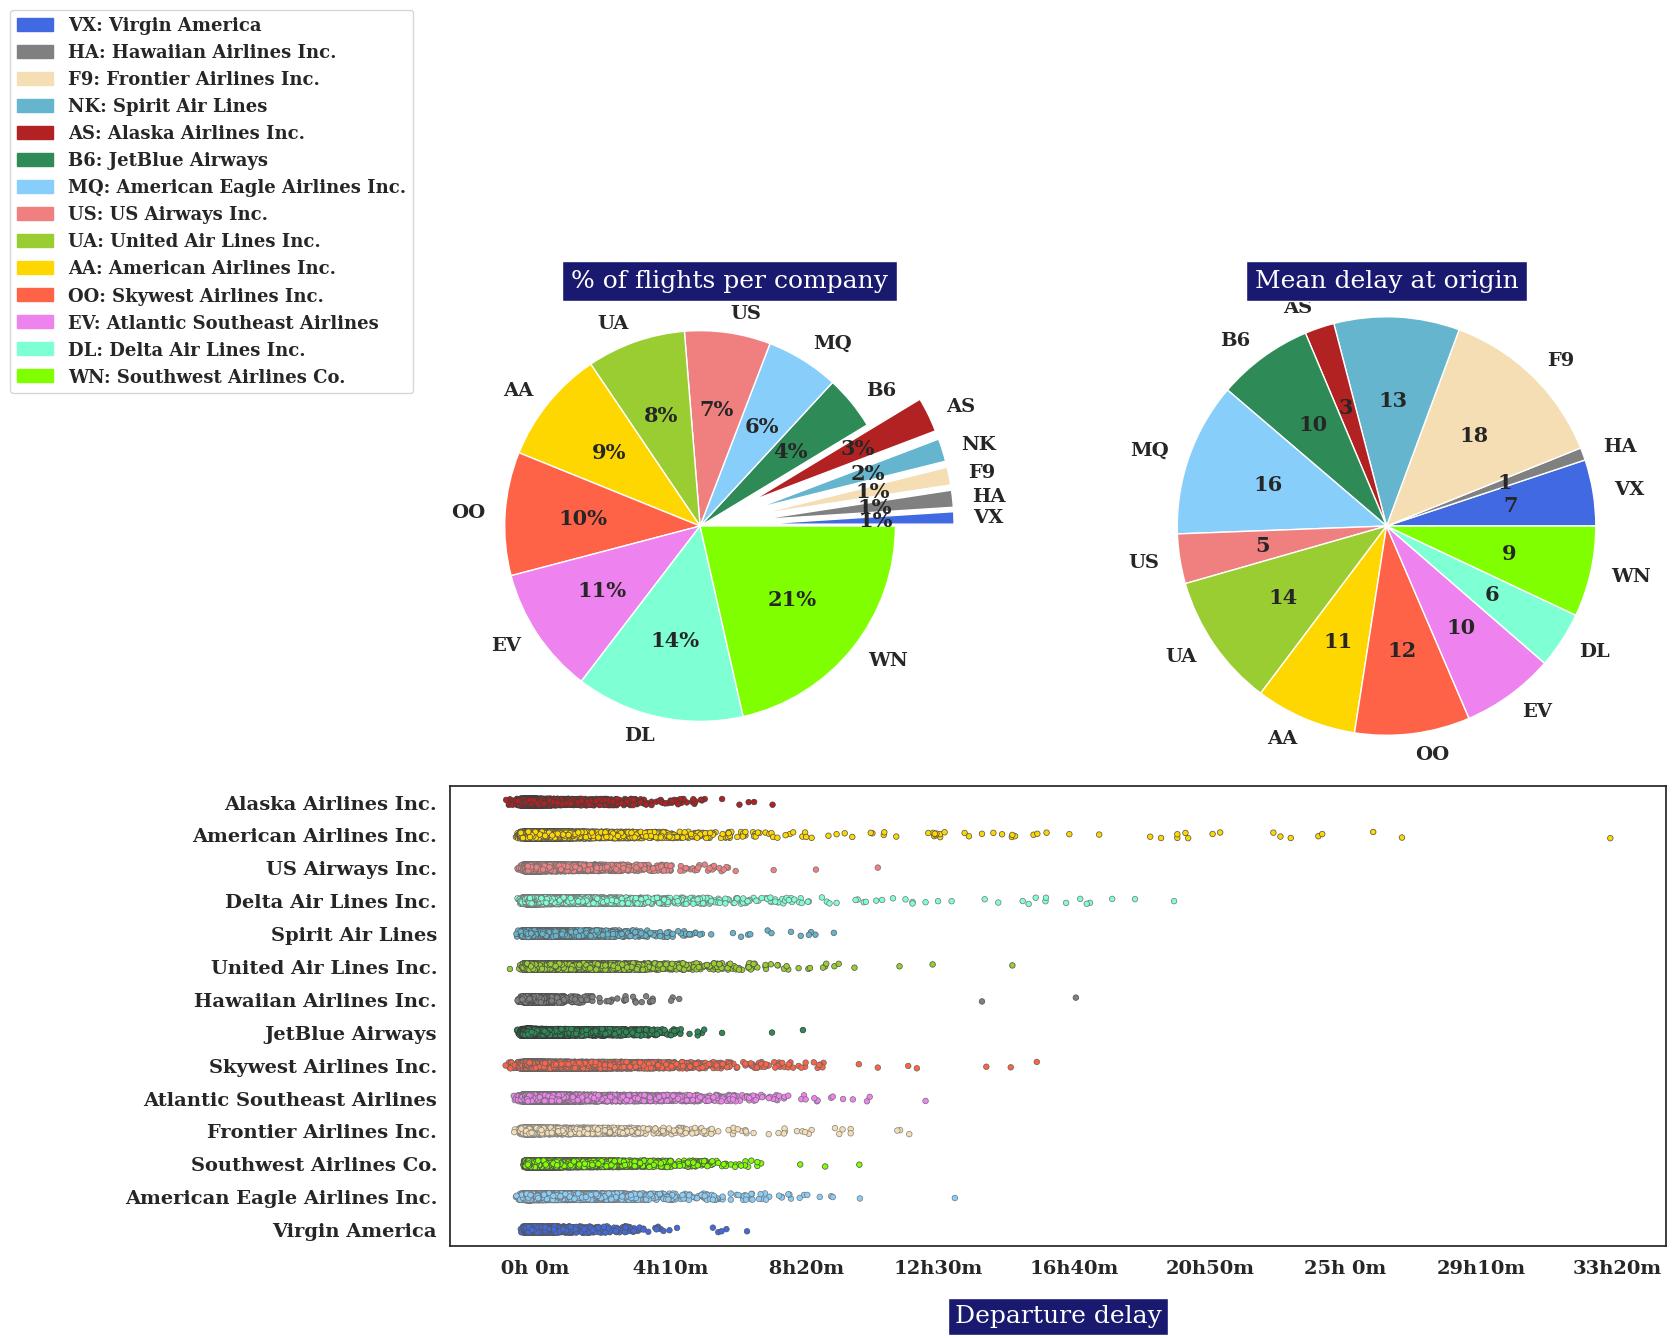

In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set custom font properties
font = {'family': 'serif', 'weight': 'bold', 'size': 15}
mpl.rc('font', **font)

# Extract a subset of columns and redefine the airlines labeling
df2 = flights_df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)

# Define colors for pie charts
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

# Create a new figure with subplots
fig = plt.figure(1, figsize=(16, 15))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Pie chart nº1: Number of flights per airline
labels = [s for s in global_stats.index]
sizes = global_stats['count'].values

# Define explode values to separate slices for emphasis
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode=explode,
                                    labels=labels, colors=colors, autopct='%1.0f%%',
                                    shadow=False, startangle=0)

# Set font size for pie chart labels
for i in range(len(abbr_companies)):
    texts[i].set_fontsize(14)

ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor': 'midnightblue', 'pad': 5},
              color='w', fontsize=18)

# Create a legend for airline abbreviations
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
                                       label=global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9),
           fontsize=13, bbox_transform=plt.gcf().transFigure)

# Pie chart nº2: Mean departure delay per airline
sizes = global_stats['mean'].values

# Ensure no negative values for sizes (delay)
sizes = [max(s, 0) for s in sizes]

# Define explode values to separate slices for emphasis
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode=explode, labels=labels,
                                    colors=colors, shadow=False, startangle=0,
                                    autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100))

# Set font size for pie chart labels
for i in range(len(abbr_companies)):
    texts[i].set_fontsize(14)

ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor': 'midnightblue', 'pad': 5},
              color='w', fontsize=18)

# Strip plot with all the values reported for the delays
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

# Create a strip plot for departure delays
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size=4, palette=colors,
                    data=df2, linewidth=0.5, jitter=True)

# Set font size for tick labels
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

# Format x-axis tick labels as hours and minutes
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)])
                     for x in ax3.get_xticks()])

# Set labels and formatting for x and y axes
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

# Adjust subplot layout
plt.tight_layout(w_pad=3)

# Show the plot
plt.show()


First Pie Chart:
1. It gives the percentage of flights per airline, we see that there is some disparity between the carriers
2. Southwest Airlines accounts for  ∼
 20% of the flights which is similar to the number of flights chartered by the 7 tiniest airlines show in pie chart

Second Pie Chart:
1. Excluding Hawaiian Airlines and Alaska Airlines that report extremely low mean delays, we obtain that a value of  ∼
 11 ± 7 minutes Means delay at origin airport for other airlines.
2. The mean delay is very less for each airline which shows that every airline makes an effort not to have delays and respect the schedule.

Third strip plot/graph:
1. The strip plot/figure at the bottom makes a census of all the delays that were measured in January 2015.
2. Strip plot show how flight departure delays are spread out which show Dispersion of Data.
3. It shows Relative Homogeneityin perspective of the second pie chart.
4. Majority of Flights Are On Time: The low average delay of around 10 minutes is because most flights take off on time, with very little delay.
5. Occasional Large Delays: However, occasionally, there are some flights with very long delays, even reaching several tens of hours. This means that while most flights are punctual, there are exceptional cases where flights can be extremely delayed.



---



Lets plot and see the delays min stats for each airline verus no of flight it operates.

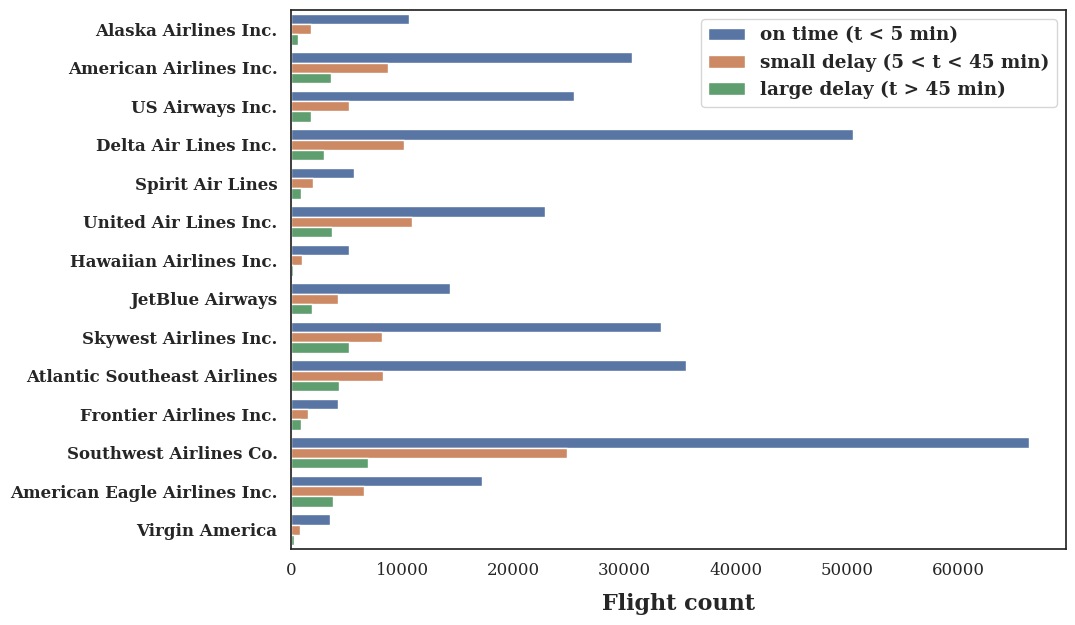

In [ ]:
# Function that defines how delays are grouped based on the departure delay value
# It returns 0 for delays <= 5 minutes, 1 for delays between 5 and 45 minutes, and 2 for delays > 45 minutes
delay_type = lambda x: ((0, 1)[x > 5], 2)[x > 45]

# Apply the delay_type function to create a new 'DELAY_LEVEL' column in the DataFrame
flights_df['DELAY_LEVEL'] = flights_df['DEPARTURE_DELAY'].apply(delay_type)

# Create a figure for the countplot
fig = plt.figure(1, figsize=(10, 7))

# Create a countplot to visualize flight counts by airline and delay level
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights_df)

# Replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight='normal', rotation=0)
plt.setp(ax.get_yticklabels(), fontsize=12, weight='bold', rotation=0)
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight='bold', labelpad=10)

# Set the legend labels for the three delay levels
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

# Display the plot
plt.show()


1. The abov estrip plot gives a count of the delays:

  *   Delay of less than 5 minutes
  *   Those in the range 5 < t < 45 min
  *   The delays greater than 45 minutes.

2. Delays greater than 45 minutes only account for a few percents of airlines.
3. The proportion of delays in these three groups depends on the airline
  * For example, in the case of SkyWest Airlines, the delays greater than 45 minutes are only lower by  ∼
 30% with respect to delays in the range 5 < t < 45 min.
4. Things are better for SoutWest Airlines since delays greater than 45 minutes are 4 times less frequent than delays in the range 5 < t < 45 min.


---



 In this section, Lets us examine in details about the distribution of delays for every airlines:

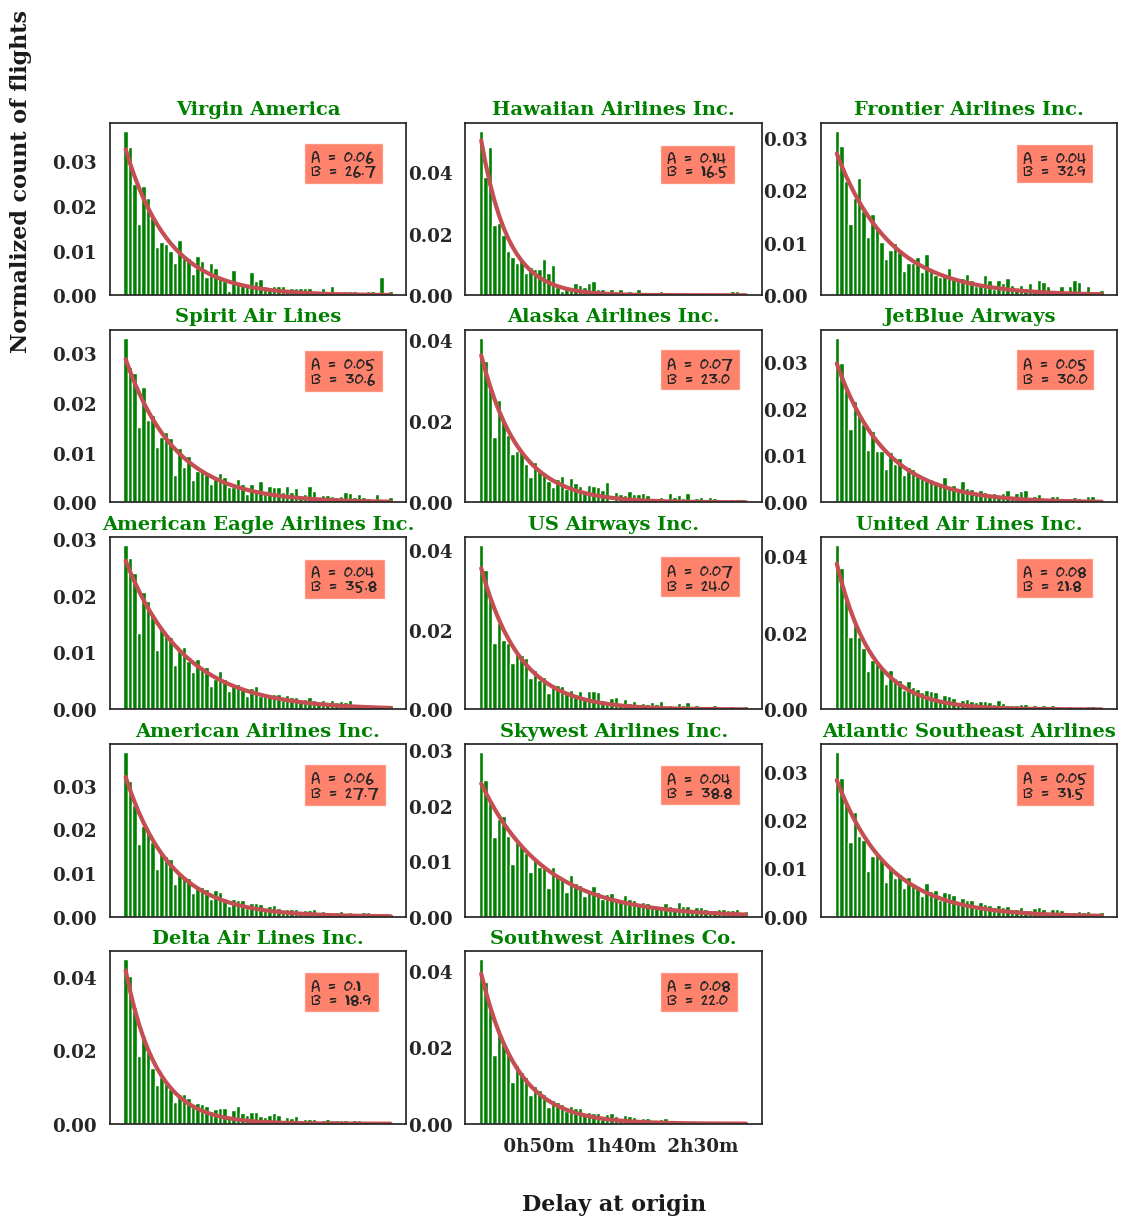

In [ ]:
# Import the curve_fit function from scipy.optimize
from scipy.optimize import curve_fit

# Define a model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)

# Initialize empty lists to store data points and company labels
points = []
label_company = []

# Create a figure for subplots
fig = plt.figure(1, figsize=(13, 13))
i = 0

# Iterate through each airline (carrier_name) in the global_stats index
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5, 3, i)

    # Fit a distribution to the departure delay data for the current airline
    n, bins, patches = plt.hist(x=df2[df2['AIRLINE'] == carrier_name]['DEPARTURE_DELAY'],
                                range=(15, 180), density=True, bins=60, color='green')
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    popt, pcov = curve_fit(func, bin_centers, n, p0=[1, 2])

    # Store the results of the fit for this airline
    points.append(popt)
    label_company.append(carrier_name)

    # Plot the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)

    # Define tick labels for the x-axis of each subplot
    if i < 14:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)])
                            for x in ax.get_xticks()])

    # Set the title of the subplot with the airline name
    plt.title(carrier_name, fontsize=14, fontweight='bold', color='green')

    # Add labels to the axes
    if i == 4:
        ax.text(-0.3, 0.9, 'Normalized count of flights', fontsize=16, rotation=90,
                color='k', horizontalalignment='center', transform=ax.transAxes)
    if i == 14:
        ax.text(0.5, -0.5, 'Delay at origin', fontsize=16, rotation=0,
                color='k', horizontalalignment='center', transform=ax.transAxes)

    # Add a legend showing the values of the 'a' and 'b' coefficients from the fit
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0], 2), round(popt[1], 1)),
            style='italic', transform=ax.transAxes, fontsize=12, family='fantasy',
            bbox={'facecolor': 'tomato', 'alpha': 0.8, 'pad': 5})

# Adjust the layout of subplots for better spacing
plt.tight_layout()


1. The above figure shows the normalised distribution of delays that I model with an exponential distribution function f(x)=aexp(−x/b). The A and B parameters obtained to describe each airline are given in the upper right corner of each panel

2. The A and B coefficients of the 14 airlines showing that Hawaiian Airlines and Delta Airlines occupy the first two places

3. Looking at the A & B value it seem SkyWest Airlines is worst carrier followed by American Eagle Airlines.

4. The more the value of B worst is the Carrier.



---



**We have talked much about the delay statistics. Is there a relation between the origin airport and delays.**

1. More busy airport can add to delay to the airline due to various operational factor.
2. More busy airport means more busy city.
3. Can the passenger onboarding causes delay?


**Lets try to define if there is a correlation between the delays registered and the airport of origin.**

In [ ]:
print("Nb of airports: {}".format(len(flights_df['ORIGIN_AIRPORT'].unique())))

Nb of airports: 312


In [ ]:
# Create an empty dictionary to store the number of unique origin airports for each carrier
origin_nb = dict()

# Iterate through each carrier (airline) in the abbr_companies dictionary
for carrier in abbr_companies.keys():
    # Extract a list of unique origin airports for flights operated by the current carrier
    liste_origin_airport = flights_df[flights_df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()

    # Calculate and store the number of unique origin airports in the dictionary
    origin_nb[carrier] = len(liste_origin_airport)

# Return the origin_nb dictionary, which contains the counts of unique origin airports for each carrier
origin_nb


{'UA': 77,
 'AA': 81,
 'US': 74,
 'F9': 63,
 'B6': 57,
 'OO': 175,
 'AS': 59,
 'NK': 33,
 'WN': 86,
 'DL': 145,
 'EV': 166,
 'HA': 17,
 'MQ': 122,
 'VX': 18}

Lets Plot the Histogram between Airline Versus Airport visted

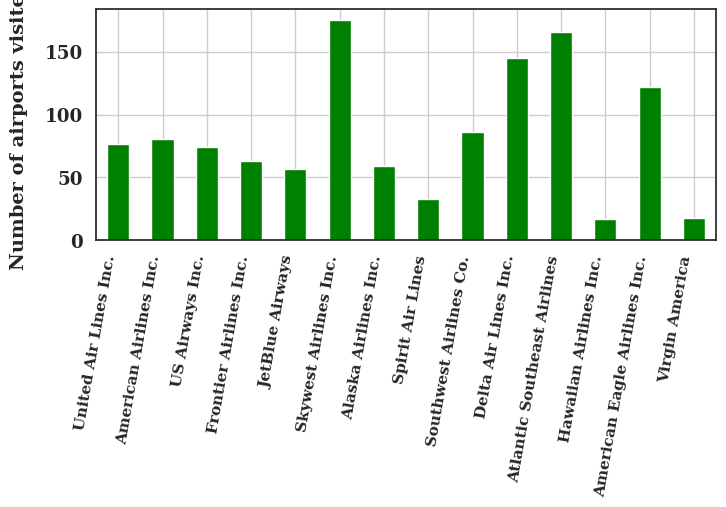

In [ ]:
# Create a DataFrame 'test_df' from the 'origin_nb' dictionary with the carrier codes as the index
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')

# Rename the column to 'count' for clarity
test_df.rename(columns={0: 'count'}, inplace=True)

# Create a bar plot using the DataFrame 'test_df'
# Set the figure size to (8, 3)
ax = test_df.plot(kind='bar', figsize=(8, 3), color='green', grid=True)

# Replace the x-axis tick labels (carrier codes) with their corresponding airline names
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Add a y-axis label with the specified font size and weight
plt.ylabel('Number of airports visited', fontsize=14, weight='bold', labelpad=12)

# Set the font size, horizontal alignment, and rotation of x-axis tick labels
plt.setp(ax.get_xticklabels(), fontsize=11, ha='right', rotation=80)

# Hide the legend
ax.legend().set_visible(False)

# Display the plot
plt.show()


**Lets us see how the origin airport impact delays**

In this section, Lets us see the variations of the delays with respect to the origin airport and for every airline.

Let us determine the mean delays per airport:

In [ ]:
# Create a DataFrame 'airport_mean_delays' with unique origin airports as the index
airport_mean_delays = pd.DataFrame(pd.Series(flights_df['ORIGIN_AIRPORT'].unique()))

# Set the index of 'airport_mean_delays' to the unique origin airports
airport_mean_delays.set_index(0, drop=True, inplace=True)

# Iterate through each carrier in the abbr_companies dictionary
for carrier in abbr_companies.keys():
    # Create a DataFrame 'df1' containing flights operated by the current carrier
    df1 = flights_df[flights_df['AIRLINE'] == carrier]

    # Calculate statistics for departure delay grouped by origin airport
    # The 'get_stats' function is applied to each group
    test = df1['DEPARTURE_DELAY'].groupby(flights_df['ORIGIN_AIRPORT']).apply(get_stats).unstack()

    # Store the mean departure delay for each origin airport in the 'airport_mean_delays' DataFrame
    # The carrier's code (abbreviation) is used as the column label
    airport_mean_delays[carrier] = test.loc[:, 'mean']

airport_mean_delays


,UA,AA,US,F9,B6,OO,AS,NK,WN,DL,EV,HA,MQ,VX
0,,,,,,,,,,,,,,
ANC,25.317073,NaN,-2.200000,NaN,NaN,NaN,0.130346,NaN,NaN,-1.750000,NaN,NaN,NaN,NaN
LAX,11.346121,3.598453,1.445826,7.383721,7.764706,7.342227,0.751269,15.432234,11.743558,4.158012,NaN,-0.732283,21.535714,6.937000
SFO,10.796458,9.944316,1.058962,8.528571,7.031250,15.035610,6.467706,NaN,12.250624,4.480519,NaN,-0.622951,NaN,3.426328
SEA,9.819820,8.010840,10.004484,12.888889,13.627737,16.302966,5.082300,NaN,10.026718,6.729517,NaN,-2.693548,NaN,5.552083
LAS,6.091440,9.163451,-0.109980,17.211454,7.888889,11.745174,1.455497,7.874659,10.332212,4.080000,NaN,1.986667,NaN,9.222552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTH,NaN,NaN,NaN,NaN,NaN,30.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADQ,NaN,NaN,NaN,NaN,NaN,NaN,-8.827586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,NaN,NaN


In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/flight_dataset/airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

Since the number of airports is quite large, a graph showing all the information at once would be a bit messy, since it would represent around 4400 values (i.e. 312 airports  ×
  14 airlines). Hence, I just represent a subset of the data:

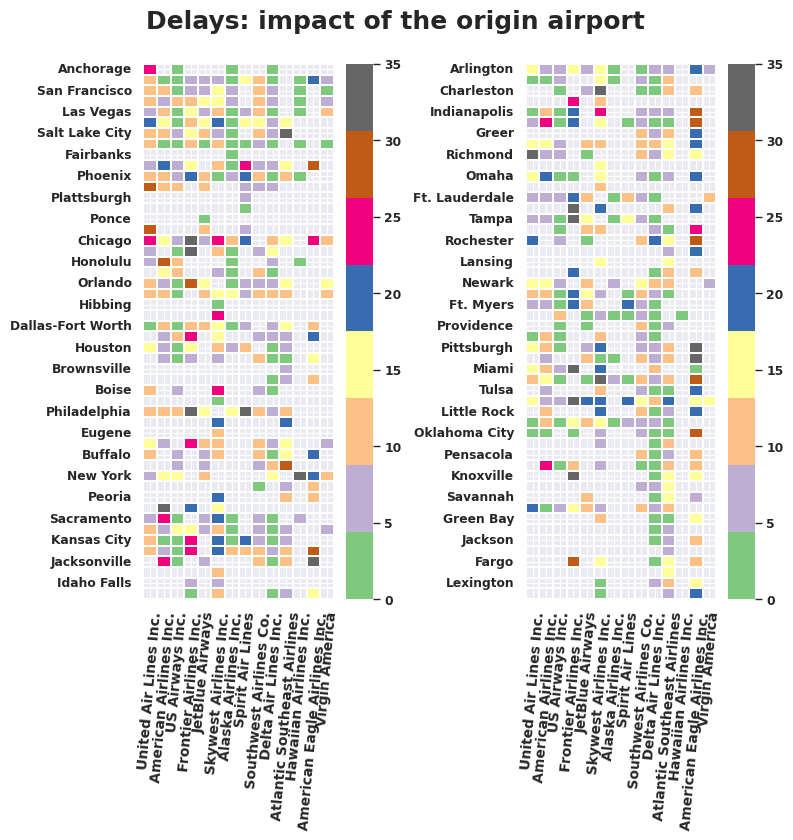

In [ ]:
# Set the Seaborn context to "paper" for plot aesthetics
sns.set(context="paper")

# Create a figure with a size of 8x8 inches
fig = plt.figure(1, figsize=(8, 8))

# Add the first subplot to the figure
ax = fig.add_subplot(1, 2, 1)

# Select a subset of the 'airport_mean_delays' DataFrame containing the first 50 rows and all columns
# Rename the columns using airline abbreviations from the 'abbr_companies' dictionary
subset = airport_mean_delays.iloc[:50, :].rename(columns=abbr_companies)

# Rename the index of the subset DataFrame using the 'identify_airport' function
subset = subset.rename(index=identify_airport)

# Create a mask to hide cells with missing (NaN) values in the subset DataFrame
mask = subset.isnull()

# Create a heatmap of the subset DataFrame with specified settings
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin=0, vmax=35)

# Customize the appearance of x-axis tick labels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)

# Hide the y-axis label
ax.yaxis.label.set_visible(False)

# Add the second subplot to the figure
ax = fig.add_subplot(1, 2, 2)

# Select another subset of the 'airport_mean_delays' DataFrame containing rows 50 to 100 and all columns
# Rename the columns using airline abbreviations from the 'abbr_companies' dictionary
subset = airport_mean_delays.iloc[50:100, :].rename(columns=abbr_companies)

# Rename the index of the subset DataFrame using the 'identify_airport' function
subset = subset.rename(index=identify_airport)

# Set the title above both subplots
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize=18)

# Create a mask to hide cells with missing (NaN) values in the subset DataFrame
mask = subset.isnull()

# Create a heatmap of the subset DataFrame with specified settings
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin=0, vmax=35)

# Customize the appearance of x-axis tick labels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)

# Hide the y-axis label
ax.yaxis.label.set_visible(False)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the figure with subplots
plt.show()


From above heat map:
1. If we look at the right panel, it will be seen that the column associated with American Eagle Airlines mostly reports large delays.
2. The column associated with Delta Airlines is mainly associated with delays of less than 5 minutes.
3. If we now look at the airports of origin, we will see that some airports favor late departures: see e.g. Denver, Chicago or New York.
4. Conversely, other airports will mainly know on time departures such as Portland or Oakland.
5. We can also deduce from these observations that there is a high variability in average delays, both between the different airports but also between the different airlines. This is important because it implies that in order to accurately model the delays, it will be necessary to adopt a model that is specific to the company and the home airport .

In [ ]:
# Define the 'carrier' variable as 'WN' (presumably an airline code).
carrier = 'WN'

# Define the 'id_airport' variable as 4.
id_airport = 4

# Create a list called 'liste_origin_airport' that contains unique values from the 'ORIGIN_AIRPORT' column
# of the 'flights_df' DataFrame where the 'AIRLINE' column is equal to 'carrier' (WN).
liste_origin_airport = flights_df[flights_df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()

# Create a new DataFrame 'df2' by filtering the 'flights_df' DataFrame using multiple conditions:
# 1. The 'AIRLINE' column must be equal to 'carrier' (WN).
# 2. The 'ARRIVAL_DELAY' column must be greater than 0.
# 3. The 'ORIGIN_AIRPORT' column must be equal to the value at 'id_airport' index in 'liste_origin_airport'.
df2 = flights_df[(flights_df['AIRLINE'] == carrier) & (flights_df['ARRIVAL_DELAY'] > 0)
         & (flights_df['ORIGIN_AIRPORT'] == liste_origin_airport[id_airport])]

# Sort the 'df2' DataFrame based on the 'SCHEDULED_DEPARTURE' column in place (modifying 'df2' itself).
df2.sort_values('SCHEDULED_DEPARTURE', inplace=True)


In [ ]:
print('Dataframe dimensions:',df2.shape)

Dataframe dimensions: (2358, 12)


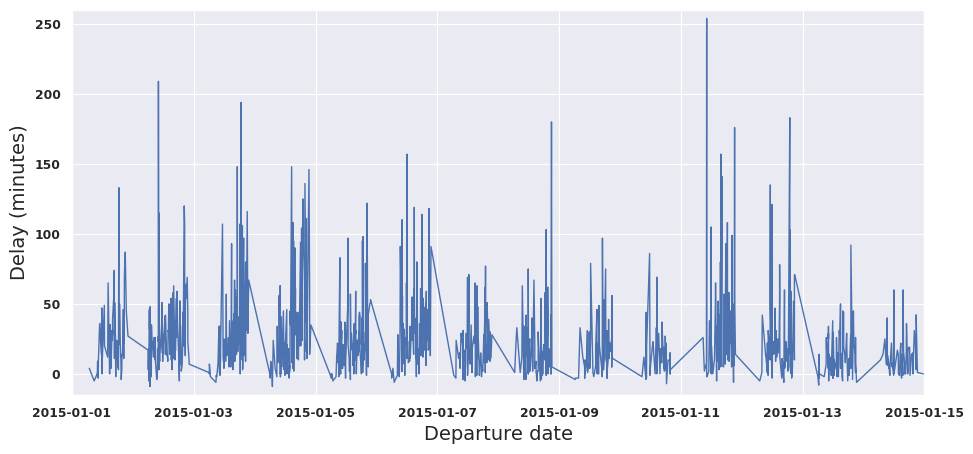

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Create a new figure with specified size
fig1 = plt.figure(figsize=(11, 5))

# Add a subplot (1 row, 1 column, position 1)
ax1 = fig1.add_subplot(1, 1, 1)

# Customize the plot style
ax1.plot(df2['SCHEDULED_DEPARTURE'], df2['DEPARTURE_DELAY'], linestyle='-', linewidth=1)

# Set labels and font sizes
ax1.set_ylabel('Delay (minutes)', fontsize=14)
ax1.set_xlabel('Departure date', fontsize=14)

# Define date limits
date_1 = datetime.datetime(2015, 1, 1)
date_2 = datetime.datetime(2015, 1, 15)
ax1.set_xlim(date_1, date_2)
ax1.set_ylim(-15, 260)

# Show the plot
plt.show()


This figure shows the existence of cycles, both in the frequency of the delays but also in their magnitude. In fact, intuitively, it seems quite logical to observe such cycles since they will be a consequence of the day-night alternation and the fact that the airport activity will be greatly reduced (if not inexistent) during the night. This suggests that a important variable in the modeling of delays will be take-off time. To check this hypothesis, I look at the behavior of the mean delay as a function of departure time, aggregating the data of the current month:

In [ ]:
# Define a function 'func2' that takes 'x', 'a', 'b', and 'c' as parameters and returns a quadratic function result.
def func2(x, a, b, c):
    return a * x**2 + b * x + c

# Add a new column 'heure_depart' to 'df2' which contains the time component of 'SCHEDULED_DEPARTURE'.
df2['hour_depart'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x: x.time())

# Group 'DEPARTURE_DELAY' in 'df2' by 'heure_depart' and apply the 'get_stats' function to calculate statistics.
test2 = df2['DEPARTURE_DELAY'].groupby(df2['hour_depart']).apply(get_stats).unstack()

# Define a lambda function 'fct' that converts a time object to seconds.
fct = lambda x: x.hour * 3600 + x.minute * 60 + x.second

# Convert the index of 'test2' (time values) to an array of seconds.
x_val = np.array([fct(s) for s in test2.index])


# Extract the 'mean' values from 'test2' and store them in 'y_val'.
y_val = test2['mean']

# Use curve fitting ('curve_fit' function) to fit the 'func2' function to 'x_val' and 'y_val' data.
# Initial parameter estimates [1, 2, 3] are provided as 'p0'.
popt, pcov = curve_fit(func2, x_val, y_val, p0=[1, 2, 3])

# Calculate the fitted values using the 'func2' function and store them in a new column 'fit' in 'test2'.
test2['fit'] = pd.Series(func2(x_val, *popt), index=test2.index)


In [ ]:
test2.index

Index([06:00:00, 06:05:00, 06:10:00, 06:15:00, 06:20:00, 06:25:00, 06:30:00,
       06:35:00, 06:40:00, 06:45:00,
       ...
       21:00:00, 21:05:00, 21:10:00, 21:15:00, 21:20:00, 21:25:00, 21:30:00,
       21:40:00, 22:05:00, 22:10:00],
      dtype='object', name='hour_depart', length=168)

In [ ]:
# import matplotlib.pyplot as plt
# import datetime

# # Create a new figure with specified size
# fig1 = plt.figure(figsize=(8, 4))

# # Add a subplot (1 row, 1 column, position 1)
# ax1 = fig1.add_subplot(1, 1, 1)

# # Convert 'heure_depart' from datetime.time to seconds since midnight
# x_val = [t.hour * 3600 + t.minute * 60 + t.second for t in df2['hour_depart']]

# # Customize the plot style for the initial data points
# ax1.scatter(x_val, df2['DEPARTURE_DELAY'], marker='o', linestyle='-', label='initial data points')

# # Customize the plot style for the 'mean' line
# # ax1.plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')

# # Customize the plot style for the 'fit' line
# # ax1.plot(x_val, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')

# # Set labels and font sizes
# ax1.set_ylabel('Delay (minutes)', fontsize=14)
# ax1.set_xlabel('Departure time', fontsize=14)

# # Set the y-axis limits
# ax1.set_ylim(-15, 210)

# # Add a legend to the upper left corner
# ax1.legend(loc='upper left')

# # Show the plot
# plt.show()


Here, we can see that the average delay tends to increase with the departure time of day: flights leave on time in the morning and the delay grows almost monotonously up to 30 minutes at the end of the day. In fact, this behavior is quite general and looking at other aiports or companies, we would find similar trends.


---



# **Predicting flight delays using Linear Regression**

The previsous sections dealt with an exploration of the dataset. Here, I start with the modeling of flight delays. In this section, my goal is to create a model that uses a window of 3 weeks to predict the delays of the following week. Hence, I decide to work on the data of January with the aim of predicting the delays of the epoch 23th−31th of January

In [ ]:
df_train = flights_df[flights_df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test  = flights_df[flights_df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
flights_df = df_train

**Let's see one airline and one airport**

To model the delays by considering separately the different airlines and by splitting the data according to the different home airports.
This will help to understand more on the quality of fit.

First of all, I consider the American Airlines flights and make a census of the number of flights that left each airport:

In [ ]:
#AA is American Airlines
carrier = 'AA'
check_airports = flights_df[(flights_df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         flights_df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

,min,max,count,mean
ORIGIN_AIRPORT,,,,
JAC,-19.0,47.0,25.0,-3.640000
GUC,-24.0,199.0,22.0,13.227273
SDF,-8.0,55.0,19.0,8.421053
LIT,-5.0,74.0,9.0,12.555556
MTJ,-2.0,51.0,3.0,26.000000


Looking at this list, we can see that the less visited aiports only have a few flights in a month. Thus, for less visited airport, it is impossible to perform a regression.

1. Another pitfall to avoid is that of "accidental" delays: a particular attention should be paid to extreme delays.

2. During the exploration, it was seen that occasionally, delays of several hours (even tens of hours) could be recorded. This type of delay is however marginal (a few %) and the cause of these delays is probably linked to unpredictable events (weather, breakdown, accident, ...).

3. On the other hand, taking into account a delay of this type will likely introduce a bias in the analysis. Moreover, the weight taken by large values will be significant if we have a small statistics.

In order to illustrate this, I first define a function that calculates the mean flights delay per airline and per airport:

In [ ]:
# Import necessary libraries (not shown in the provided code)
import numpy as np

# Define the function with parameters: df (DataFrame), carrier (airline code), id_airport (airport code), extrem_values (a boolean flag, default is False)
def get_flight_delays(df, carrier, id_airport, extrem_values=False):
    # Filter the DataFrame df to select rows where the 'AIRLINE' column matches the carrier and the 'ORIGIN_AIRPORT' column matches the id_airport.
    df2 = flights_df[(flights_df['AIRLINE'] == carrier) & (flights_df['ORIGIN_AIRPORT'] == id_airport)]

    # Check if extrem_values is True (meaning extreme values should be removed)
    if extrem_values:
        # Set departure delays greater than or equal to 60 minutes to NaN (missing value)
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x: x if x < 60 else np.nan)
        # Drop rows with missing values (NaN) in any column
        df2 = df2.dropna(how='any')

    # Sort the filtered DataFrame df2 based on the 'SCHEDULED_DEPARTURE' column in ascending order
    df2.sort_values('SCHEDULED_DEPARTURE', inplace=True)

    # Create a new column 'heure_depart' by extracting the time from the 'SCHEDULED_DEPARTURE' column
    df2['hour_depart'] = df2['SCHEDULED_DEPARTURE'].apply(lambda x: x.time())

    # Group flights by 'heure_depart' (departure time) and calculate statistics on 'DEPARTURE_DELAY' for each group
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['hour_depart']).apply(get_stats).unstack()

    # Reset the index of the grouped DataFrame
    test2.reset_index(inplace=True)

    # Define a function fct to convert the 'heure_depart' column (time) into seconds
    fct = lambda x: x.hour * 3600 + x.minute * 60 + x.second

    # Reset the index of the grouped DataFrame again
    test2.reset_index(inplace=True)

    # Apply the function fct to 'heure_depart' and store the result in a new column 'heure_depart_min' (time in seconds)
    test2['hour_depart_min'] = test2['hour_depart'].apply(fct)

    # Return the final DataFrame containing flight delay statistics and time in seconds
    return test2

Function that performs a linear regression on these values:

In [ ]:
from sklearn import metrics, linear_model

def linear_regression(test2):
    # Select the 'mean' and 'heure_depart_min' columns from the input DataFrame 'test2'
    test = test2[['mean', 'hour_depart_min']].dropna(how='any', axis=0)

    # Extract the 'heure_depart_min' and 'mean' values and convert them into NumPy arrays
    X = np.array(test['hour_depart_min'])
    Y = np.array(test['mean'])

    # Reshape the arrays to ensure they have the right shape for linear regression
    X = X.reshape(len(X), 1)
    Y = Y.reshape(len(Y), 1)

    # Create a Linear Regression model
    regr = linear_model.LinearRegression()

    # Fit the model with the data
    regr.fit(X, Y)

    # Predict the values using the trained model
    result = regr.predict(X)

    # Return the original X, Y, and the predicted values
    return X, Y, result

Consider two scenarios:

1. In the first case, I take all the initial values.
2. In the second case, I eliminate all delays greater than 1h before calculating the average delay

The comparison of the two cases is quite explicit:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

In [ ]:
id_airport = 'PHL'
df2 = flights_df[(flights_df['AIRLINE'] == carrier) & (flights_df['ORIGIN_AIRPORT'] == id_airport)]
df2['hour_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['hour_depart'] = df2['hour_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
#___________________
# first case
test2 = get_flight_delays(flights_df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
#___________________
# second case
test3 = get_flight_delays(flights_df, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

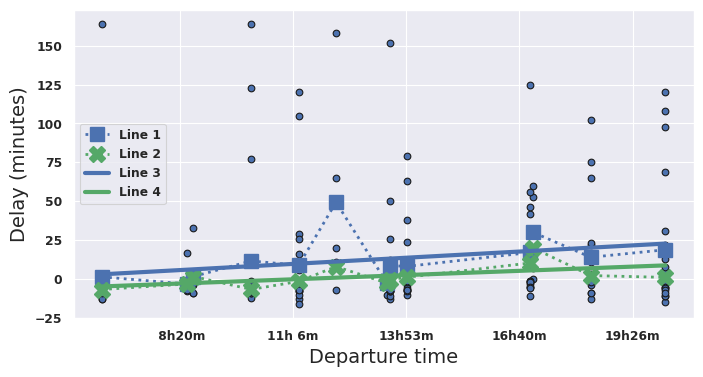

In [ ]:
import matplotlib.pyplot as plt

# Create a Matplotlib figure with a size of 8x4 inches
fig1, ax = plt.subplots(figsize=(8, 4))

# Create a scatter plot
ax.scatter(df2['hour_depart'], df2['DEPARTURE_DELAY'], marker='o', edgecolors='k')

# Create line plots with different styles
ax.plot(X1, Y1, color='b', linestyle=':', linewidth=2, marker='s', markersize=10, label='Line 1')
ax.plot(X2, Y2, color='g', linestyle=':', linewidth=2, marker='X', markersize=12, label='Line 2')
ax.plot(X1, result2, color='b', linewidth=3, label='Line 3')
ax.plot(X2, result3, color='g', linewidth=3, label='Line 4')

# Customize the appearance of the plot
ax.set_ylabel('Delay (minutes)', fontsize=14)
ax.set_xlabel('Departure time', fontsize=14)
ax.legend()

# Convert and set the x-axis tick labels
fct_convert = lambda x: (int(x / 3600), int(divmod(x, 3600)[1] / 60))
xtick_labels = ['{:2.0f}h{:2.0f}m'.format(*fct_convert(x)) for x in ax.get_xticks()]
ax.set_xticklabels(xtick_labels)

# Show the plot
plt.show()


1. Gray points represent individual flight data.
2. Mean of gray points gives mean delays.
3. Mean of initial points corresponds to blue squares.
4. Removing extreme delays (>1h) results in green crosses representing average delays.
5. The solid blue curve predicts an average delay approximately 10 minutes larger than the green curve, regardless of the hour.
6. Managing extreme delays significantly affects the modeling.
7.This example magnifies the impact of extreme delays due to a limited number of flights.
8. Extreme delays may have a less pronounced impact in most cases.

In [ ]:
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

regr1 = linear_model.LinearRegression()


print('***With Intial Data point****')

# Fit the model with the data
regr1.fit(X1, Y1)

#print the coefficients and the intercept
print('intercept: ', regr1.intercept_)
print('coefficients:')
print(regr1.coef_)

print('\n*****************\n')
print('***Removing data point for Extreme Delay****')

regr2 = linear_model.LinearRegression()

# Fit the model with the data
regr2.fit(X2, Y2)

#print the coefficients and the intercept
print('intercept: ', regr2.intercept_)
print('coefficients:')
print(regr2.coef_)

# print('Recall the coefficients and intercept from our formula:')
# print(beta_train)

***With Intial Data point****
intercept:  [-6.15096017]
coefficients:
[[0.00039686]]

*****************


***Removing data point for Extreme Delay****
intercept:  [-11.05234369]
coefficients:
[[0.00027194]]


In [ ]:
# Predict the values using the trained model for Initial Data points
y1_predict = regr1.predict(X1)
y1_predict

# Predict the values using the trained model post removing the extreme Data points
y2_predict = regr2.predict(X2)
y2_predict

array([[-4.77055759],
       [-2.73101664],
       [-2.56785337],
       [-1.18096553],
       [-0.0388226 ],
       [ 0.85857541],
       [ 2.08229998],
       [ 2.16388162],
       [ 2.57178981],
       [ 5.52504509],
       [ 5.5903104 ],
       [ 6.97719824],
       [ 8.77199427]])

In [ ]:
# importing R2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# computing R2 score and sum of square residuals
n = len(X1)
score1=r2_score(Y1,y1_predict)
print('When considered all data:')
print('R^2 score is:',score1)
mse=mean_squared_error(Y1,y1_predict)
print('sum of squared residuals:',n*mse)
print('RMSE:',np.sqrt(mse))
print('\n*****************\n')

score2=r2_score(Y2,y2_predict)
print('When remove the extreme delay data points:')
print('R^2 score is:',score2)
mse=mean_squared_error(Y2,y2_predict)
print('sum of squared residuals:',n*mse)
print('RMSE:',np.sqrt(mse))
print('*****************')

When considered all data:
R^2 score is: 0.1710317642061101
sum of squared residuals: 2068.6658146840477
RMSE: 12.61460025490624

*****************

When remove the extreme delay data points:
R^2 score is: 0.30916000647321984
sum of squared residuals: 447.79632644633557
RMSE: 5.869060509579258
*****************


1. Lower Value R^2 Square show that linear regression is not a good model fit.
2. However, if you removing the extreme delay , we can an improvment in the model.
3. Final conclusion is we need to asses using some other regression techniques to find the best fit model for these data.
